
# Introduction

In this notebook,I analyzed and visualized data from the demographic information and what financial services are used by approximately 10,000 individuals across Tanzania.This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.Each individual was classified as mobile money only,mobile money with other services,non mobile money and non mobile money and other services.This was done to represent the relationship between financial services accessed and how often the mobile money services are used(non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")

%matplotlib inline


In [2]:
df = pd.read_csv("training.csv")

df.tail()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3
7093,3946,78,1,3,1,1,2,2,0,0,...,-1,4,4,-5.192204,38.764523,0,0,0,0,0



Renaming columns of age,gender,maritual status,land ownership and income types


In [3]:
df.rename(columns = {
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Maritual Status",
    "Q5": "Land Ownership", 
    "Q6": "Other land ownership", 
    "Q7": "Mobile Or Non mobile", 
    "Q8_1": "Salaries/Wages",
    "Q8_2": "Food Producer",
    "Q8_3": "Service Provider", 
    "Q8_4": "Parttime Occupation", 
    "Q8_5": "Rental Income", 
    "Q8_6":  "Investments", 
    "Q8_7": "Pension",
    "Q8_8": "Grant",
    "Q8_9": "Dependent On Others", 
    "Q8_10": "No Income",
    "Q8_11": "Other",
    "Q16": "Mobile Money Purchase", 
    "Q17": "Mobile Money Bills"
}, inplace = True)

# Below I checked the data type and my colums to check if there's nothing I'm not expecting.


In [4]:
#Checking columns and data types
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ID', 'Age', 'Gender', 'Maritual Status', 'Q4', 'Land Ownership',
        'Other land ownership', 'Mobile Or Non mobile', 'Salaries/Wages',
        'Food Producer', 'Service Provider', 'Parttime Occupation',
        'Rental Income', 'Investments', 'Pension', 'Grant',
        'Dependent On Others', 'No Income', 'Other', 'Q9', 'Q10', 'Q11', 'Q12',
        'Q13', 'Q14', 'Q15', 'Mobile Money Purchase', 'Mobile Money Bills',
        'Q18', 'Q19', 'mobile_money', 'savings', 'borrowing', 'insurance',
        'mobile_money_classification'],
       dtype='object'),
 dtype('float64'): Index(['Latitude', 'Longitude'], dtype='object')}

Now that I know the data types and which columns I wanna work with,I am gonna get rid of the columns that I do not need by droping all unneeded columns to make it easier to work with the needed dataframe.

In [5]:
df.drop(["Q4",
         "Q9",
         "Q10",
         "Q11",
         "Q12", 
         "Q13", 
         "Q14", 
         "Q15", 
         "Q18",
         "Q19",
         "Latitude",
         "Longitude"], axis = 1 , inplace = True)
df.head()

,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,2,2,0,0,0,...,1,0,0,1,-1,0,0,0,0,0
1,1258,40,1,1,5,1,1,1,0,0,...,0,0,0,4,4,1,1,1,0,3
2,331,18,2,4,3,2,1,0,0,0,...,1,0,0,1,-1,1,0,0,0,2
3,6729,50,1,1,1,1,1,0,0,0,...,0,0,0,4,-1,1,0,1,0,3
4,8671,34,1,1,1,2,1,0,1,0,...,0,0,0,1,-1,1,1,0,1,3




# Missing Data



# 1.Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [6]:
#Finding missing observations

df.isnull().values.any()

False

There are no missing values in this dataFrame

# 2.Get basic descriptive statistics for the dataset.



Finding the basic descriptive statistics of the dataset.

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,7094.0,4742.627291,2731.120086,1.0,2397.25,4744.5,7105.0,9459.0
Age,7094.0,38.239498,16.332148,16.0,25.00,35.0,48.0,100.0
Gender,7094.0,1.559910,0.496433,1.0,1.00,2.0,2.0,2.0
Maritual Status,7094.0,1.787426,1.165160,1.0,1.00,1.0,3.0,4.0
Land Ownership,7094.0,2.548915,1.534257,1.0,1.00,3.0,4.0,6.0
Other land ownership,7094.0,1.840569,0.366103,1.0,2.00,2.0,2.0,2.0
Mobile Or Non mobile,7094.0,1.397942,0.489508,1.0,1.00,1.0,2.0,2.0
Salaries/Wages,7094.0,0.062165,0.241472,0.0,0.00,0.0,0.0,1.0
Food Producer,7094.0,0.630110,0.482809,0.0,0.00,1.0,1.0,1.0
Service Provider,7094.0,0.058077,0.233906,0.0,0.00,0.0,0.0,1.0


7094 interviews were made in total.

Finding total number of people who were interviewed(male and female)

In [8]:
#Total of male and female

Male = df[df["Gender"] == 1]
Female = df[df["Gender"] == 2]

print(f"Male = ",len(Male))
print(f"Female = ",len(Female))
print(f"Total = ", len(Male + Female))

Male =  3122
Female =  3972
Total =  7094


Out of the 7094 interviews,there total number of males who were interviewed is 3122 and the total of females is 3972.

# 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

Classifying the rows in the dataframe for non mobile money users,mobile money users,non mobile or other and both mobile money and other in a new column

In [9]:


classification = []
for i in df["mobile_money_classification"]:
    if i == 0 :
        classification.append("No_financial_services")
    
    elif i == 1 :   
        classification.append("Other_only")
    
    elif i == 2 :
         classification.append("Mm_only")
        
    else:
        classification.append("Mm_plus")
        
        
        
df["classification"] = classification

In [10]:
No_financial_services = df[(df.mobile_money_classification == 0)]
Other_only = df[(df.mobile_money_classification == 1)]
Mm_only = df[(df.mobile_money_classification == 2)]
Mm_plus = df[(df.mobile_money_classification == 3)]

df.head()

,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification,classification
0,5086,98,2,3,1,2,2,0,0,0,...,0,0,1,-1,0,0,0,0,0,No_financial_services
1,1258,40,1,1,5,1,1,1,0,0,...,0,0,4,4,1,1,1,0,3,Mm_plus
2,331,18,2,4,3,2,1,0,0,0,...,0,0,1,-1,1,0,0,0,2,Mm_only
3,6729,50,1,1,1,1,1,0,0,0,...,0,0,4,-1,1,0,1,0,3,Mm_plus
4,8671,34,1,1,1,2,1,0,1,0,...,0,0,1,-1,1,1,0,1,3,Mm_plus


Maping for mobile money classification

In [11]:
mobile_money_classification = {0 : "No_financial_services", 
                               1 : "Other_only",2 : "Mm_only",
                               3 : "Mm_plus"}
df["mobile_money_classification"] = df["mobile_money_classification"].map(mobile_money_classification)



Visualising data for (non mobile money,mobile money and both) and Age

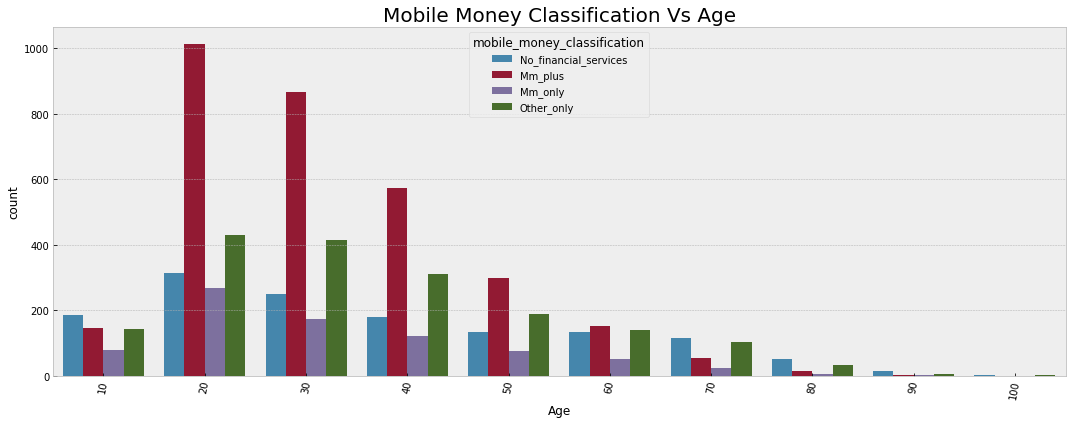

In [12]:
hue = "mobile_money_classification"

plt.figure(figsize = (15, 6))
df["Age"] = df.Age.apply(lambda x : int(x/10) * 10)

plt.title("Mobile Money Classification Vs Age", fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = "Age", hue = hue, data = df)
plt.tight_layout()
plt.show()

From the graph it is clear that people who are at their 20's use both mobile money and other services than other ages.

Maping for gender

In [13]:
gender = { 1: "Male", 2: "Female"}
df["Gender"] = df["Gender"].map(gender)


Visualising data for (non mobile money,mobile money and both) and gender

<Figure size 576x432 with 0 Axes>

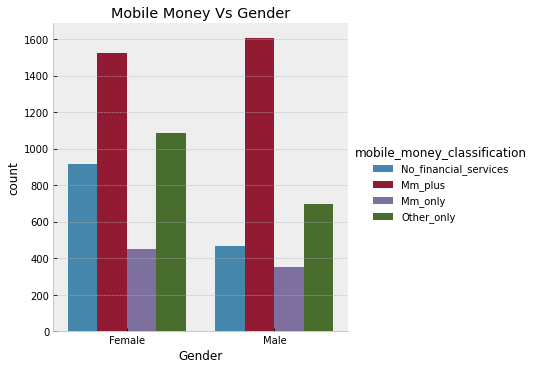

In [14]:
# Checking the gender of non mobile money,mobile money and both

plt.figure(figsize = (8, 6))
sns.catplot(x = "Gender", kind = "count",
                hue = hue, data = df)
_ = plt.title("Mobile Money Vs Gender")

There are more males with both mobile money and other services while there are less woman who use mobile money.

# Maping for income types

In [15]:
#Salaries/Wages maping
Assign_sow = {1 : "Yes", 0 : "No"}
df["Salaries/Wages"] = df["Salaries/Wages"].map(Assign_sow) 

#Food Producer maping
Assign_fp = {1 : "Yes", 0 : "No"}
df["Food Producer"] = df["Food Producer"].map(Assign_sow)

#Service Provider maping
Assign_sp = {1 : "Yes", 0 : "No"}
df["Service Provider"] = df["Service Provider"].map(Assign_sp)

#Parttime Occupation
Assign_po = {1 : "Yes", 0 : "No"}
df["Parttime Occupation"] = df["Parttime Occupation"].map(Assign_po)

#Rental Income  
Assign_ri = {1 : "Yes", 0 : "No"}
df["Rental Income"] = df["Rental Income"].map(Assign_ri)

#Investments
Assign_i =  {1 : "Yes", 0 : "No"}
df["Investments"] = df["Investments"].map(Assign_i)

#Pension maping
Assign_p = {1 : "Yes", 0 : "No"}
df["Pension"] = df["Pension"].map(Assign_p)

#Grant  
Assign_g = {1 : "Yes", 0 : "No"}
df["Grant"] = df["Grant"].map(Assign_g)

#Dependent On Others 
Assign_doo = {1 : "Yes", 0 : "No"}
df["Dependent On Others"] = df["Dependent On Others"].map(Assign_doo)

#No Income   
Assign_no = {1 : "Yes", 0 : "No"}
df["No Income"] = df["No Income"].map(Assign_no)

#Other     
Assign_o = {1 : "Yes", 0 : "No"}
df["Other"] = df["Other"].map(Assign_o)

# Visualising income types

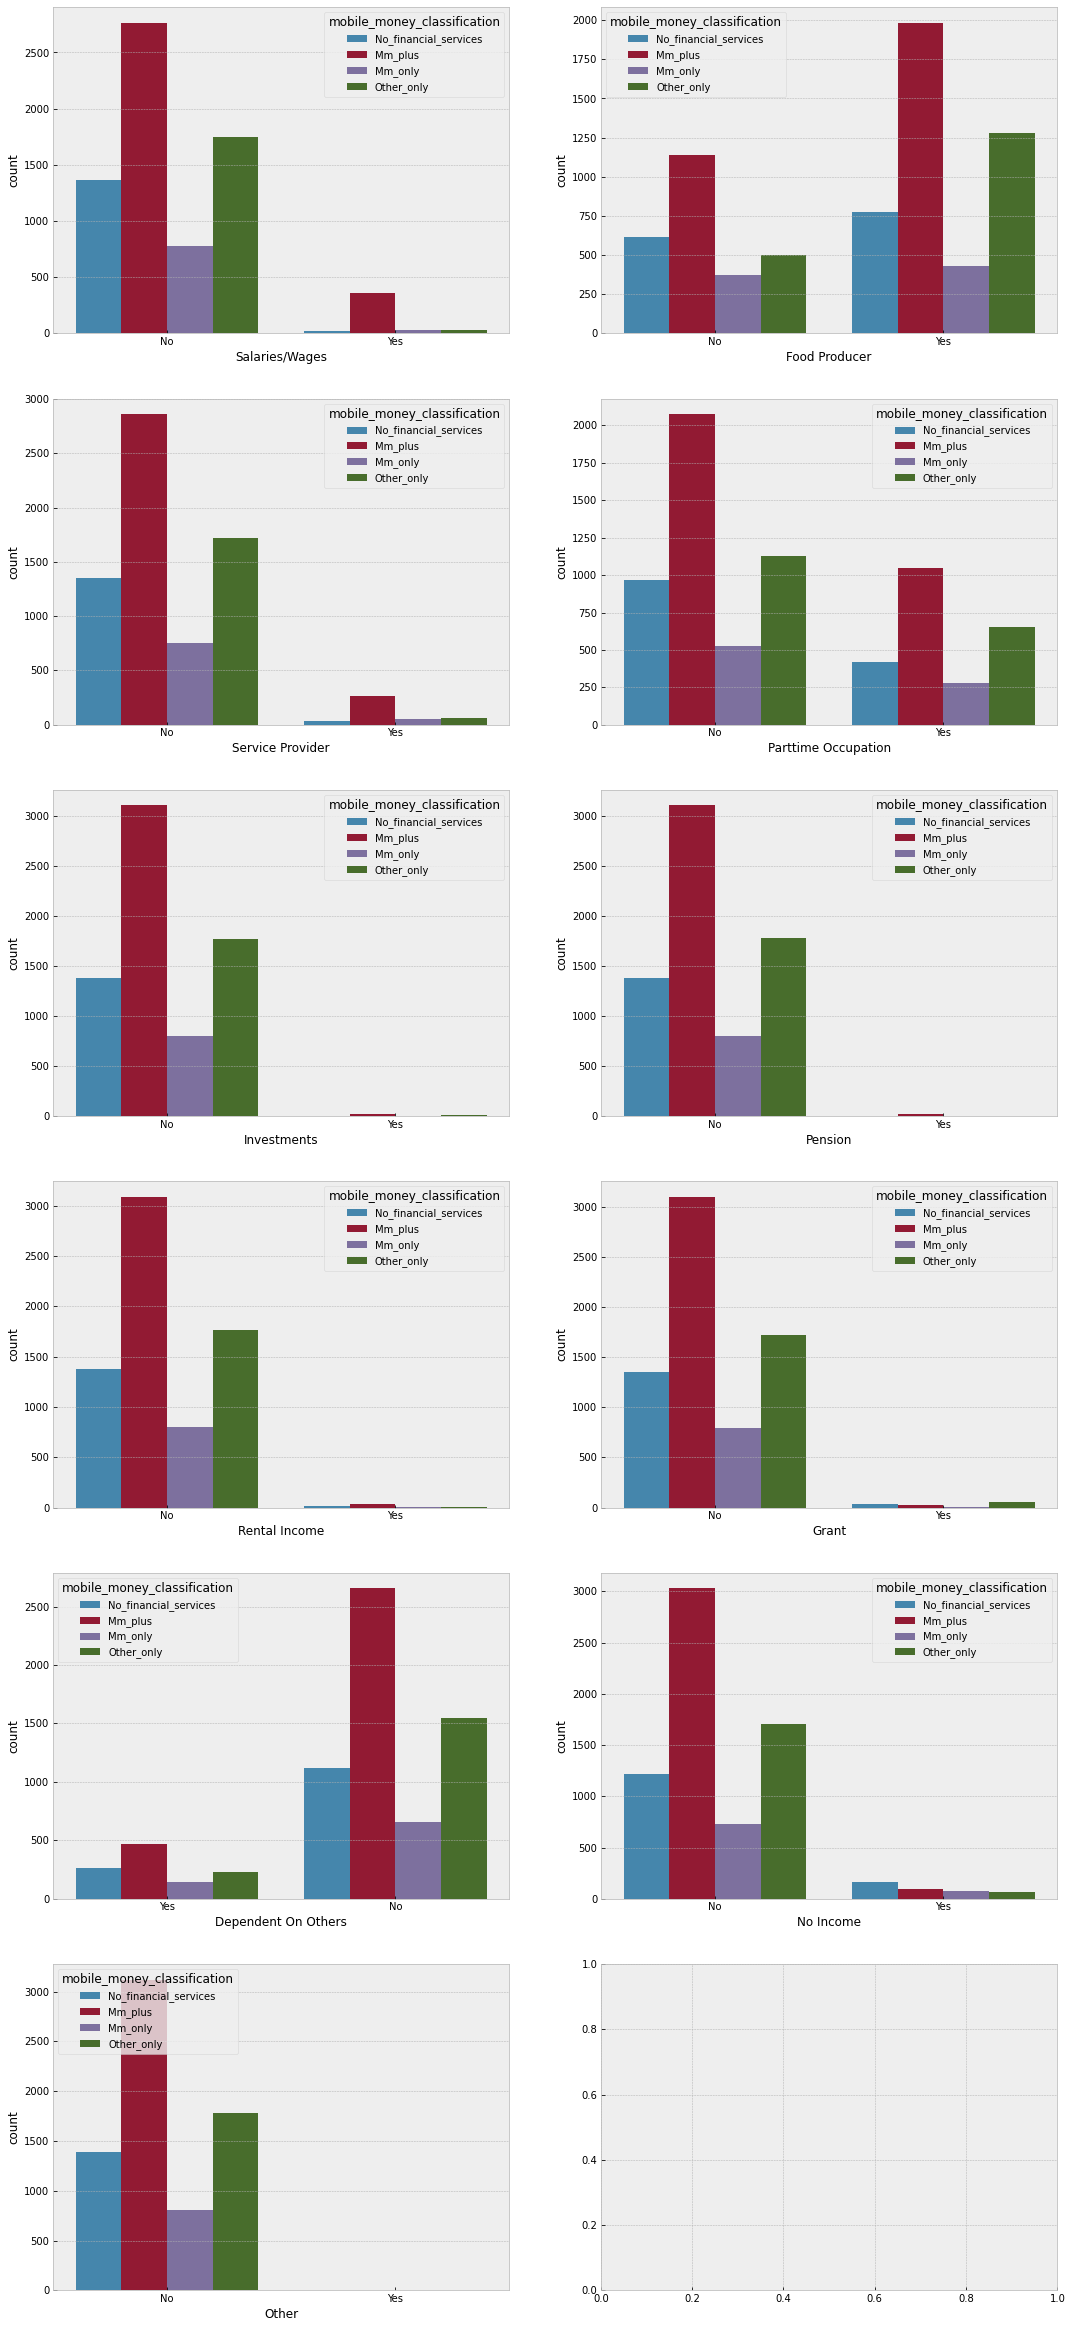

In [16]:


fig, axes = plt.subplots(6, 2, figsize=(18, 42))
sns.countplot(x = "Salaries/Wages", hue = hue, ax = axes[0, 0], data = df)
sns.countplot(x = "Food Producer", hue = hue, ax = axes[0, 1], data = df)
sns.countplot(x = "Service Provider", hue = hue, ax = axes[1, 0], data = df)
sns.countplot(x = "Parttime Occupation", hue = hue, ax = axes[1, 1], data = df)
sns.countplot(x = "Investments", hue = hue, ax = axes[2, 0], data = df)
sns.countplot(x = "Pension", hue = hue, ax = axes[2, 1], data = df)
sns.countplot(x = "Rental Income", hue = hue, ax = axes[3, 0], data = df)
sns.countplot(x = "Grant", hue = hue, ax = axes[3, 1], data = df)
sns.countplot(x = "Dependent On Others", hue = hue, ax = axes[4, 0], data = df)
sns.countplot(x = "No Income", hue = hue, ax = axes[4, 1], data = df)
sns.countplot(x = "Other", hue = hue, ax = axes[5, 0], data = df)

_= plt.show()




# Maping for Maritual Status

In [17]:
Married = df[df["Maritual Status"] == 1]
Divorced = df[df["Maritual Status"] == 2]
Widowed = df[df["Maritual Status"] == 3]
Single = df[df["Maritual Status"] == 4]


Maritual_Status = {1: "Married", 2: "Divorced", 3: "Widowed", 4:"Single"}
df["Maritual Status"] = df["Maritual Status"].map(Maritual_Status)

# Visualising data for (non mobile money,mobile money and both) and maritual status

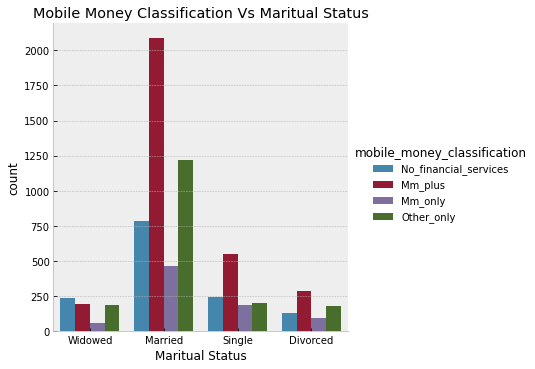

In [18]:
_ = sns.catplot(x = "Maritual Status", kind = "count",
                data = df, hue = hue)
_ = plt.title("Mobile Money Classification Vs Maritual Status")

Looking at the graph it is clear that mobile money and other services are used by married people.This can be because more married people were interviewed.

# Mapping for Land Ownership 


In [19]:
Landowner = df[df["Land Ownership"] == 1]
Sharing_land = df[df["Land Ownership"] == 2]
Household_member_owns_land = df[df["Land Ownership"] == 3]
Renting = df[df["Land Ownership"] == 4]
Owns_no_land = df[df["Land Ownership"] == 5]
Unknown = df[df["Land Ownership"] == 6]

Landownership = {1 : "Landowner", 2 : "Sharing_land",
                 3 : "Household_member_owns_land", 4 : "Renting",
                 5 : "Owns_no_land", 6 : "Unknown" }

df["Land Ownership"] = df["Land Ownership"].map(Landownership)

Visualising data for (non mobile money,mobile money and both) and Land Ownership


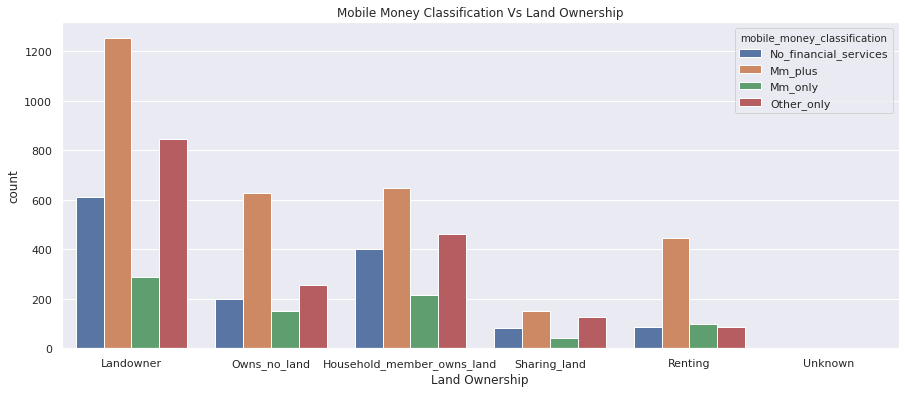

In [20]:
sns.set()
plt.figure(figsize = (15, 6))
sns.countplot(x = "Land Ownership", hue = hue, data = df)
_ = plt.title("Mobile Money Classification Vs Land Ownership")

Looking at the graph it is clear that more people who own land use mobile money and other services

 # 4.Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income

# Maping for Mobile Money Purchase 

In [21]:


mobile_money_purchase = { 
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}

df["Mobile Money Purchase"] = df["Mobile Money Purchase"].map(mobile_money_purchase)



# Maping for Mobile Money Bills


In [22]:
mobile_money_bills = {
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}
df["Mobile Money Bills"] = df["Mobile Money Bills"].map(mobile_money_bills)

# Visualising mobile services used and Age

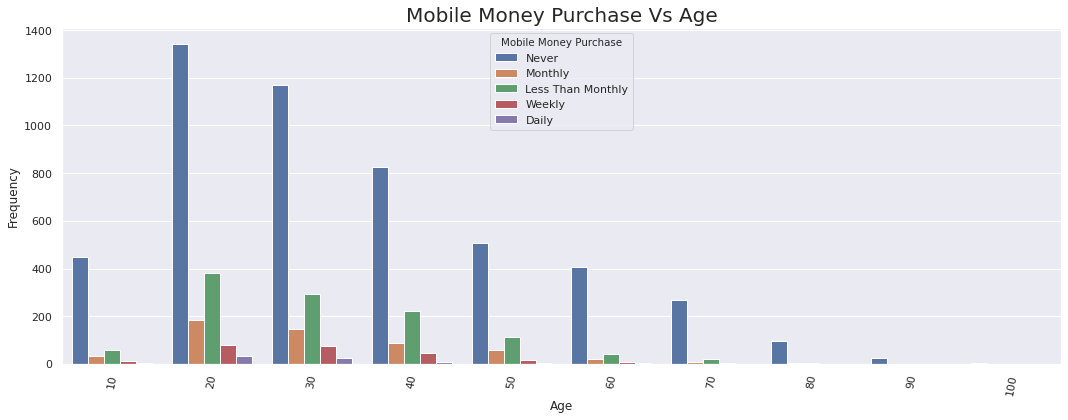

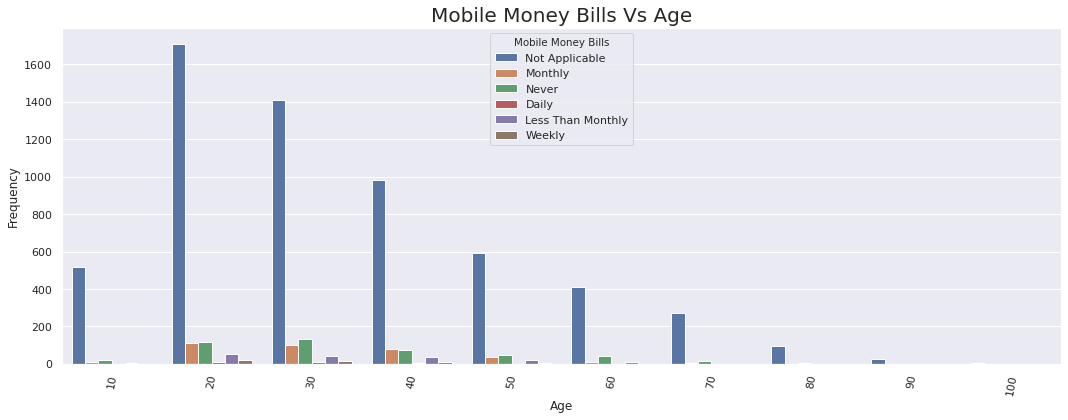

In [23]:
sns.set()
#Plotting mobile money purchase and age
hue = "Mobile Money Purchase"

plt.figure(figsize = (15, 6))
df["Age"] = df.Age.apply(lambda x : int(x/10) * 10)
plt.title("Mobile Money Purchase Vs Age", fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = "Age", hue = hue, data = df)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Plotting mobile money bills and age
by = "Mobile Money Bills"

plt.figure(figsize = (15, 6))
df["Age"] = df.Age.apply(lambda x : int(x/10) * 10)
plt.title("Mobile Money Bills Vs Age", fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = "Age", hue = by, data = df)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



# Visualising mobile services used and gender

<Figure size 576x432 with 0 Axes>

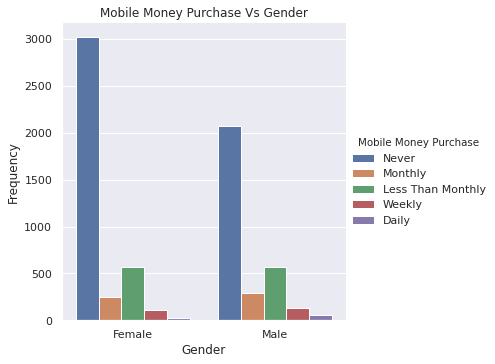

<Figure size 576x432 with 0 Axes>

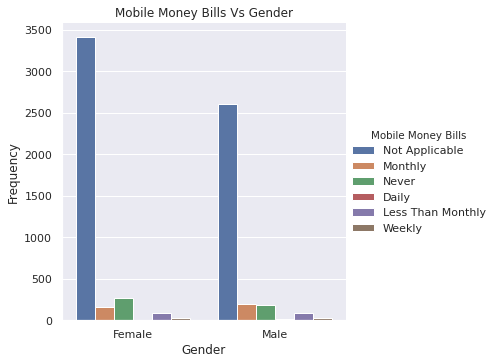

In [24]:
#plotting mobile money purchase and gender
plt.figure(figsize = (8, 6))
sns.catplot(x = "Gender", kind = "count",
                hue = hue, data = df)
_ = plt.title("Mobile Money Purchase Vs Gender")
plt.ylabel("Frequency")

#plotting mobile money bills and gender 
plt.figure(figsize = (8, 6))
sns.catplot(x = "Gender", kind = "count",
                hue = by, data = df)
_ = plt.title("Mobile Money Bills Vs Gender")
_=plt.ylabel("Frequency")


# Visualising mobile services used and maritual status

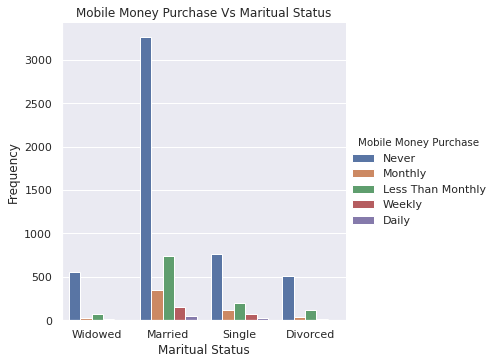

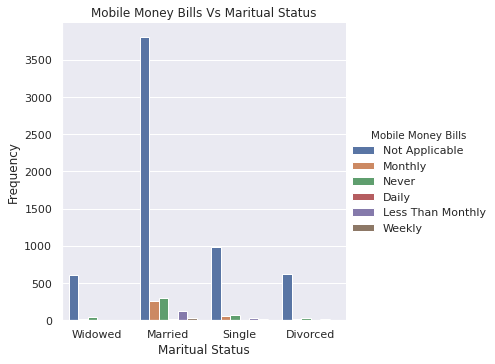

In [25]:
#Mobile money purchase vs maritual status
_ = sns.catplot(x = "Maritual Status", kind = "count",
                data = df, hue = hue)
plt.ylabel("Frequency")
_ = plt.title("Mobile Money Purchase Vs Maritual Status")

#Mobile money bills vs maritual status
_ = sns.catplot(x = "Maritual Status", kind = "count",
                data = df, hue = by)
_ = plt.title("Mobile Money Bills Vs Maritual Status")
_=plt.ylabel("Frequency")

# Visualising services used with income types

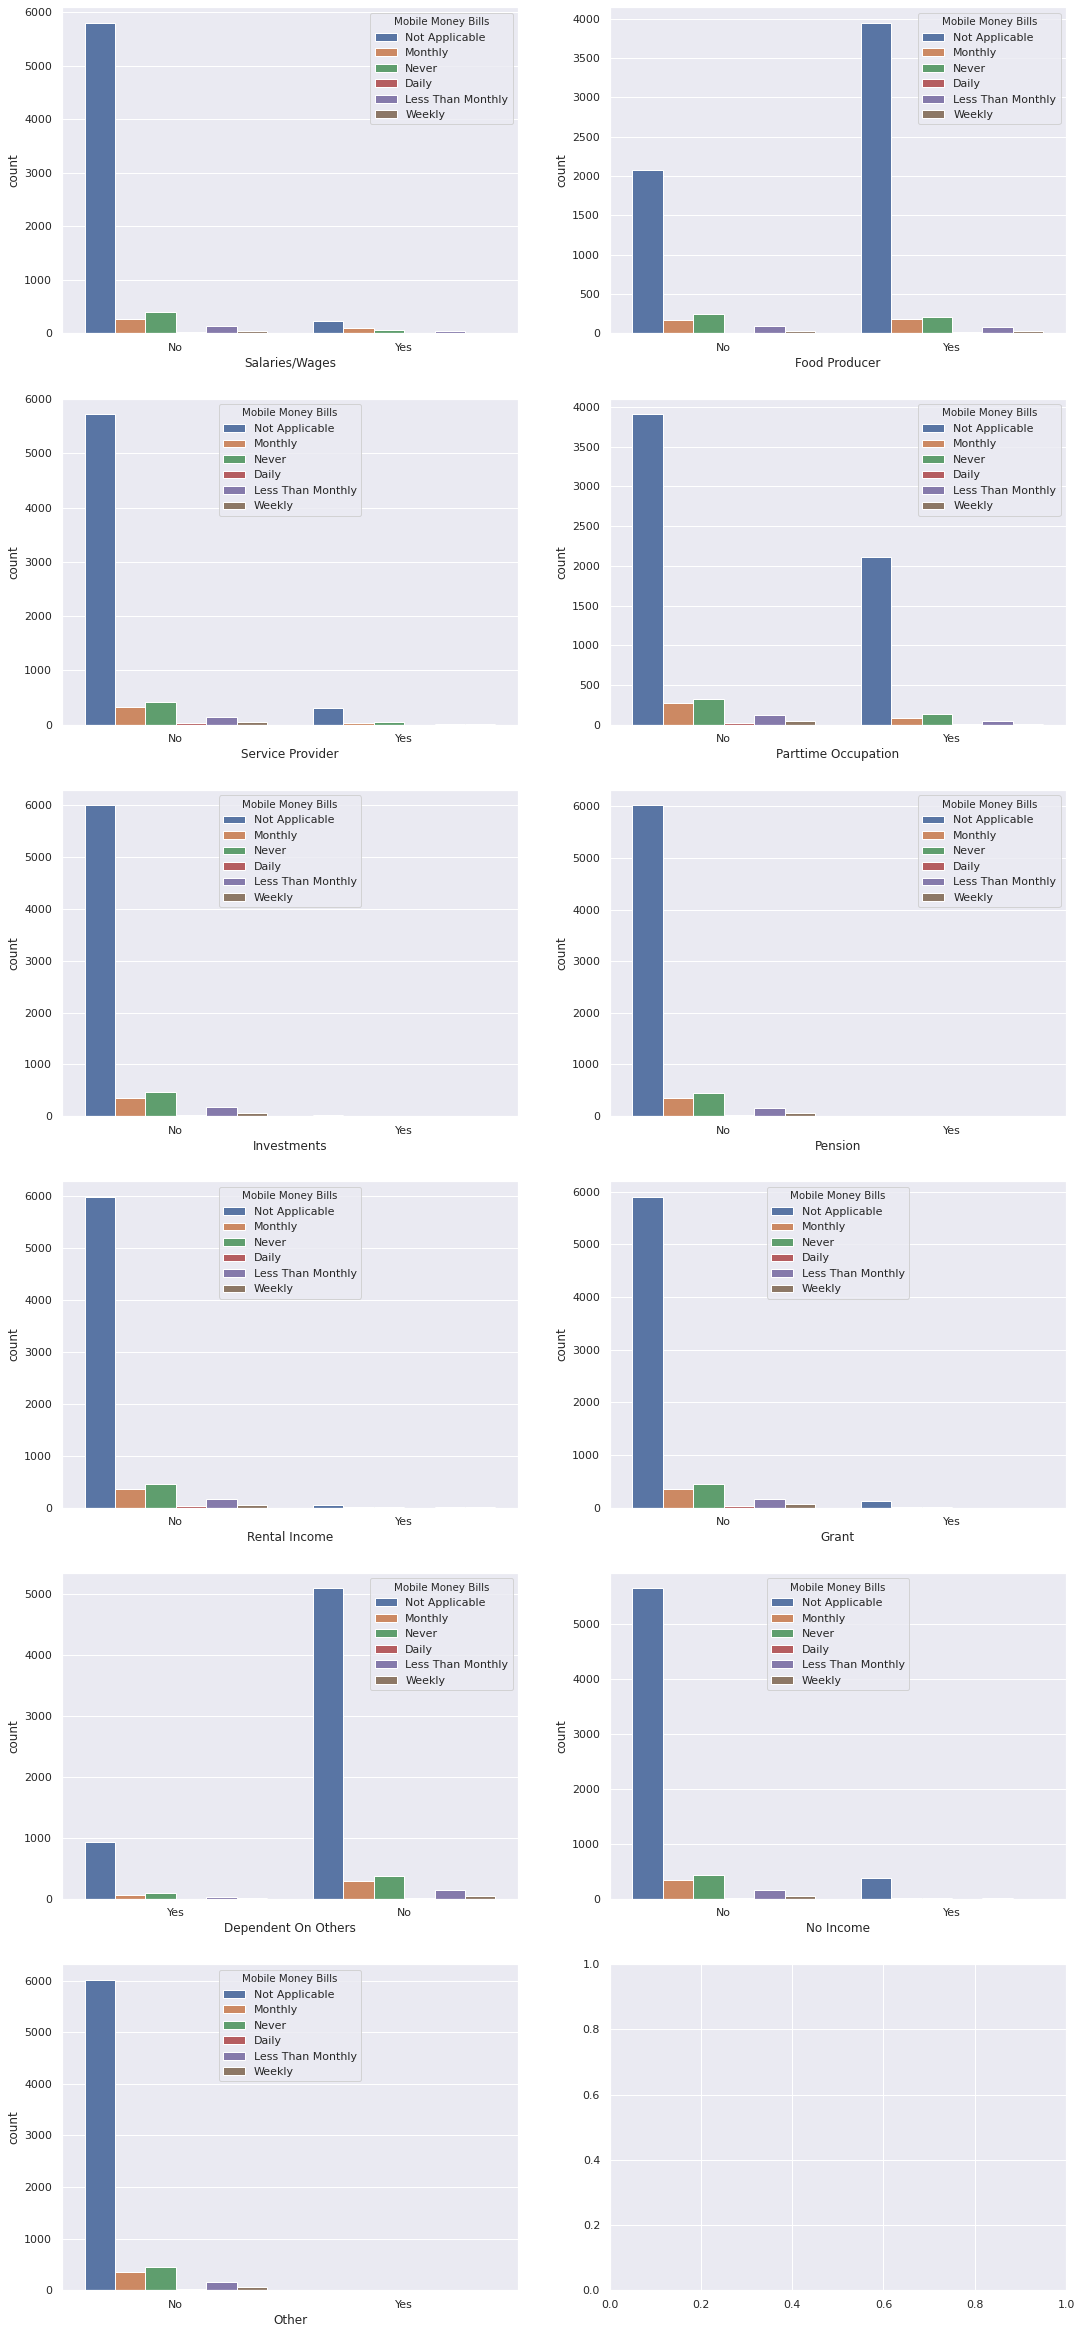

In [26]:
sns.set()
fig, axes = plt.subplots(6, 2, figsize=(18, 42))
sns.countplot(x = "Salaries/Wages", hue = by, ax = axes[0, 0], data = df)
sns.countplot(x = "Food Producer", hue = by, ax = axes[0, 1], data = df)
sns.countplot(x = "Service Provider", hue = by, ax = axes[1, 0], data = df)
sns.countplot(x = "Parttime Occupation", hue = by, ax = axes[1, 1], data = df)
sns.countplot(x = "Investments", hue = by, ax = axes[2, 0], data = df)
sns.countplot(x = "Pension", hue = by, ax = axes[2, 1], data = df)
sns.countplot(x = "Rental Income", hue = by, ax = axes[3, 0], data = df)
sns.countplot(x = "Grant", hue = by, ax = axes[3, 1], data = df)
sns.countplot(x = "Dependent On Others", hue = by, ax = axes[4, 0], data = df)
sns.countplot(x = "No Income", hue = by, ax = axes[4, 1], data = df)
sns.countplot(x = "Other", hue = by, ax = axes[5, 0], data = df)
_= plt.show()


# Visualising services used with landownership

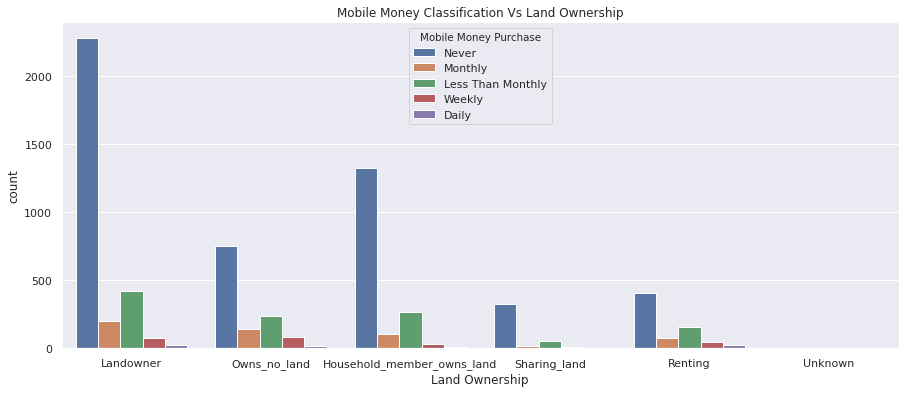

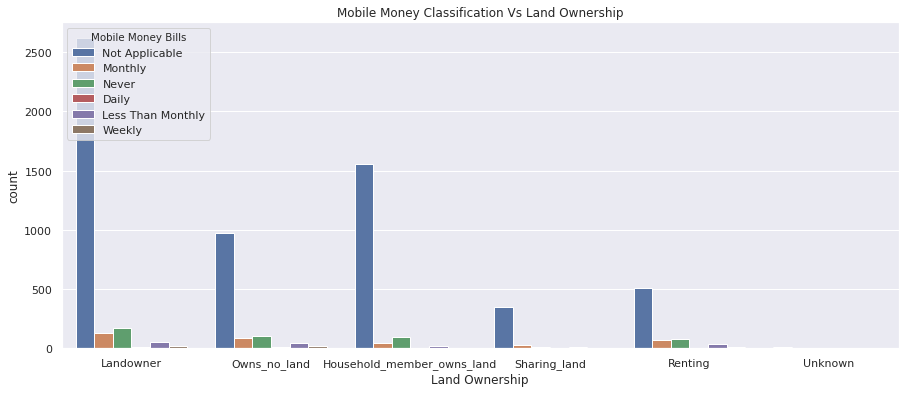

In [27]:
#plotting services purchased with land ownership
sns.set()
plt.figure(figsize = (15, 6))
sns.countplot(x = "Land Ownership", hue = hue, data = df)
_ = plt.title("Mobile Money Classification Vs Land Ownership")

#ploting service bills with land ownership
sns.set()
plt.figure(figsize = (15, 6))
sns.countplot(x = "Land Ownership", hue = by, data = df)
_ = plt.title("Mobile Money Classification Vs Land Ownership")